### Conv2D on Images with Tensorflow

No matter what learning you're going to implement, the data conversion is important and as such this notebook presents various ways to analyse and convert the input data, and use it with the Conv2D function.
We will compare how it's done in Tensorflow and numpy.

First let's load an image and display it:

Original Image


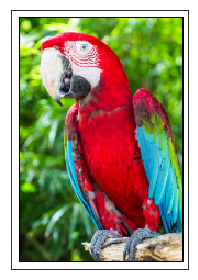

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
    
def plotImageList(label, list):
    print( label )
    i = 100+ len(list)*10
    
    for im in list:
        i+=1
        plt.subplot(i)
        if( im.ndim == 3):
            plt.imshow(im)
        else :
            plt.imshow(im, cmap = 'gray')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()    
    
# show original image
image = plt.imread("pkt.png")
plotImageList("Original Image", [image])


What is the format of the image?

In [ ]:
#numpy

In [3]:
#tensorflow

array([237, 162,   4])

Can you extract each color channels to a separate array?

channels


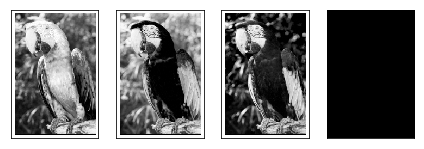

(237, 162)


In [4]:
#numpy

channels


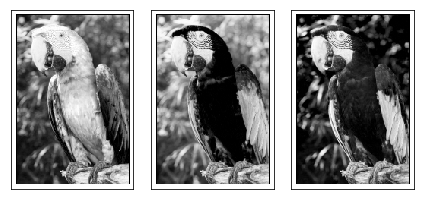

In [5]:
#tensorflow

Convert the image to grayscale

In [6]:
#done using numpy


gray 


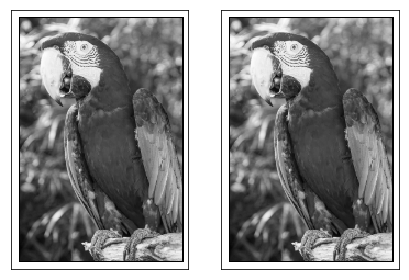

In [7]:
#using Tensoflow


reconstruc


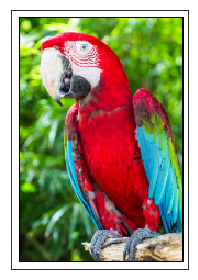

In [33]:
# for reconstructing it's important to stack the channels at the right axis


Now we want to make some convolutions of the image with different filters.

In [8]:
FILTERS = {
    "Edge Enhance": np.array([[ -1, 0, 0],
                              [-1, 1, 0],
                              [ 0, 0, 0]]),
    "Edge Enhance2": np.array([[ 0, -1, -1],
                              [0, 1, 0],
                              [ 0, 0, 0]]),
    "Edge Detect" : np.array([[0,  1, 0],
                              [1, -4, 1],
                              [0,  1, 0]]),
    "Emboss"      : np.array([[-2, -1, 0],
                              [-1,  1, 1],
                              [ 0,  1, 2]])
}

FILTERS.update({   
    "Sharpen"     : np.array([[0,  0,  -1,  0, 0], 
                              [0,  0, -2,  0, 0],
                              [-1, -2,  5, -2, -1],
                              [0,  0, -2,  0, 0],
                              [0,  0,  -1,  0, 0]]),
    "Blur"        : np.array([[0, 0, 0.2, 0, 0],
                              [0, 0.2, 0.3, 0.2, 0],
                              [0.2, 0.3, 0.5, 0.3, 0.2],
                              [0, 0.2, 0.3, 0.2, 0],
                              [0, 0, 0, 0.2, 0]])
})

Let's create a function that will make convolution from one of those filters to the previous image.

<pre>
def do_tensorflow_convolution_grayscale(image, fltr):
</pre>

In [9]:
session.run(tf.shape(greyscaleImgeTf)[1])
test = session.run(  tf.reshape(greyscaleImgeTf, [1,tf.shape(greyscaleImgeTf)[0], tf.shape(greyscaleImgeTf)[1],1]) )
test.shape

(1, 237, 162, 1)

In [10]:
??tf.nn.conv2d

input: A `Tensor`. Must be one of the following types: `half`, `float32`, `float64`.
      A 4-D tensor. The dimension order is interpreted according to the value
      of `data_format`, see below for details. `[batch, height, width, channels]`
   

filter: A `Tensor`. Must have the same type as `input`.
      A 4-D tensor of shape
      `[filter_height, filter_width, in_channels, out_channels]`

Sharpen


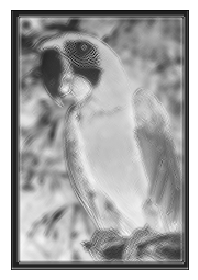

Blur


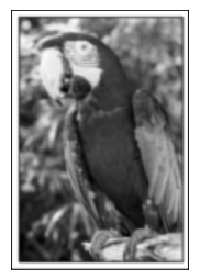

Emboss


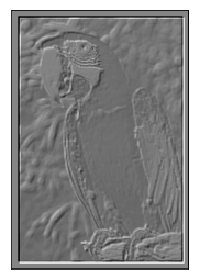

Edge Detect


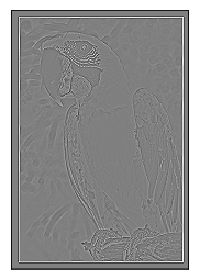

Edge Enhance


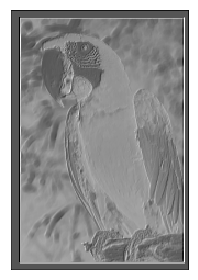

Edge Enhance2


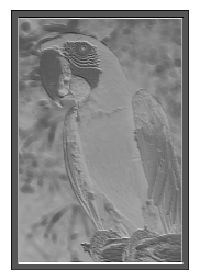

In [32]:
def do_tensorflow_convolution_grayscale(image, fltr, do_pooling=False, normalizeImage = False):
    #only one image in the batch    [batch, width, height, channels]
    imageBatch = tf.reshape(image, [1, tf.shape(image)[0], tf.shape(image)[1], 1])
    
    #filter has the shape [filter width, heigh, inChannel, outChannel]
    filterTensor = tf.convert_to_tensor(fltr, dtype = tf.float32)
    filterTensor = tf.reshape(filterTensor, [tf.shape(filterTensor)[0],tf.shape(filterTensor)[1],1,1] )
    
    conv_image = tf.nn.conv2d(imageBatch, filterTensor, [1, 1, 1, 1], "SAME")
        
    output = session.run(tf.squeeze(conv_image))
    return output

    
for f in FILTERS.keys():
    output = do_tensorflow_convolution_grayscale(greyscaleImgeTf, FILTERS[f])
    plotImageList(f,[output])

Do the same but now with each channel treated as a spearate image, as if it was batched 

start  Sharpen
pool:False norm:False


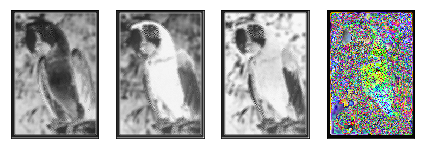

pool:True norm:True


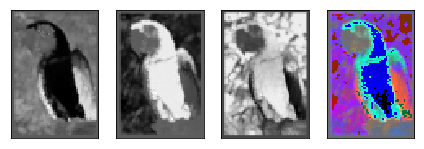

done  Sharpen
start  Blur
pool:False norm:False


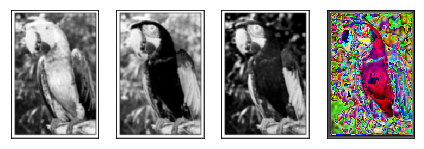

pool:True norm:True


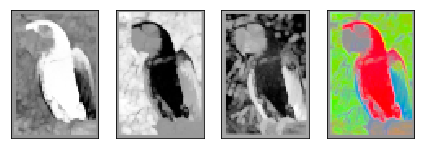

done  Blur
start  Emboss
pool:False norm:False


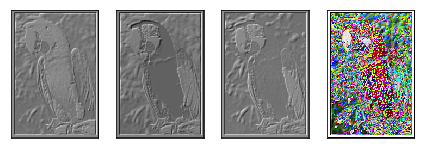

pool:True norm:True


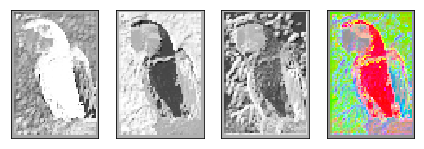

done  Emboss
start  Edge Detect
pool:False norm:False


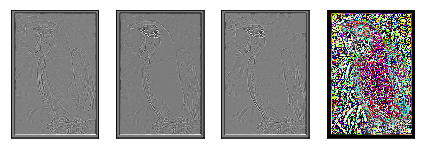

pool:True norm:True


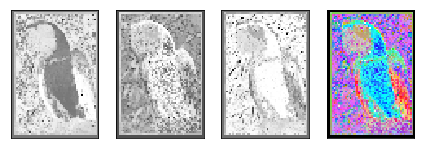

done  Edge Detect
start  Edge Enhance
pool:False norm:False


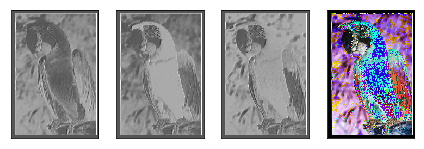

pool:True norm:True


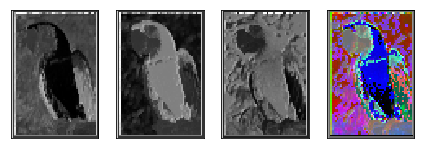

done  Edge Enhance
start  Edge Enhance2
pool:False norm:False


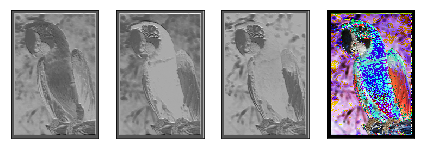

pool:True norm:True


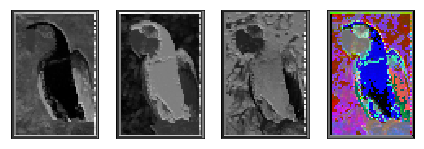

done  Edge Enhance2


In [14]:
def do_tensorflow_convolution_channel_per_channel(image, fltr, do_pooling=False, normalizeImage = False):
    #Let's stack each layer as if it was a separate channel
    unstackedColors = tf.unstack(image, num=4, axis=2)
    stackedLayers = tf.stack([unstackedColors[0], unstackedColors[1], unstackedColors[2]])  
    imageBatch = tf.reshape(stackedLayers, [tf.shape(stackedLayers)[0], tf.shape(stackedLayers)[1],tf.shape(stackedLayers)[2],1])

    #filter has the shape [filter width, heigh, inChannel, outChannel]
    filterTensor = tf.convert_to_tensor(fltr, dtype = tf.float32)
    filterTensor = tf.reshape(filterTensor, [tf.shape(filterTensor)[0],tf.shape(filterTensor)[1],1,1] )
    
    if normalizeImage:
        imageBatch = tf.nn.l2_normalize(imageBatch,0)
    conv_image = tf.nn.conv2d(imageBatch, filterTensor, [1, 1, 1, 1], "SAME")
    if normalizeImage:
        conv_image = tf.nn.l2_normalize(conv_image,0)
    if do_pooling:
        conv_image = tf.nn.max_pool(conv_image, [1, 3, 3, 1], [1, 3, 3, 1],  padding="SAME")
        
    output_image = session.run(tf.squeeze(conv_image))
    #output_image = output_image.reshape(output_image.shape[0], output_image.shape[1],output_image.shape[2])
    #combined = np.dstack( [output_image[0], output_image[1], output_image[2]])
    combined = session.run(tf.stack([output_image[0], output_image[1], output_image[2]], axis = 2))
    plotImageList("pool:{0} norm:{1}".format(do_pooling, normalizeImage), [output_image[0], output_image[1], output_image[2], combined])
    
for f in FILTERS.keys():
    #conv_output_sp = do_scipy_convolution(image, FILTERS[f])
    print( "start ", f )
    do_tensorflow_convolution_channel_per_channel(image, FILTERS[f])
    do_tensorflow_convolution_channel_per_channel(image, FILTERS[f],do_pooling=True, normalizeImage = True)
    print( "done ", f )

Do the same but now with a batch of one 3 channel image, you'll need to create a filter that is deeper.

start  Sharpen
Sharpen


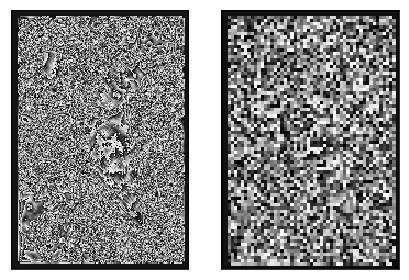

done  Sharpen
start  Blur
Blur


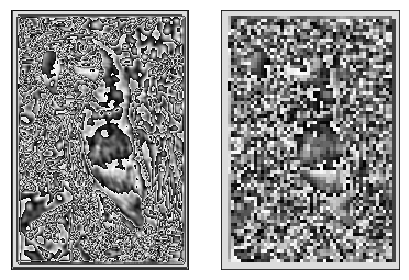

done  Blur
start  Emboss
Emboss


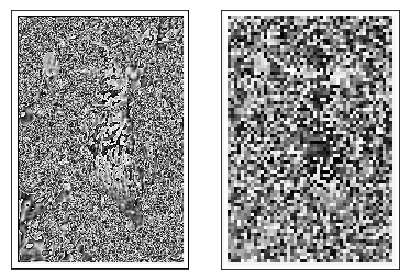

done  Emboss
start  Edge Detect
Edge Detect


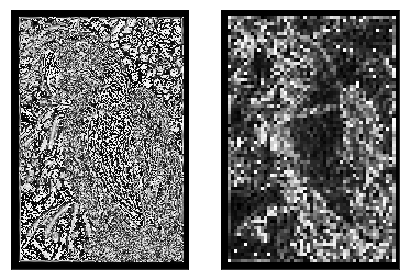

done  Edge Detect
start  Edge Enhance
Edge Enhance


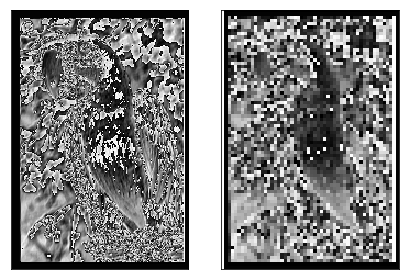

done  Edge Enhance
start  Edge Enhance2
Edge Enhance2


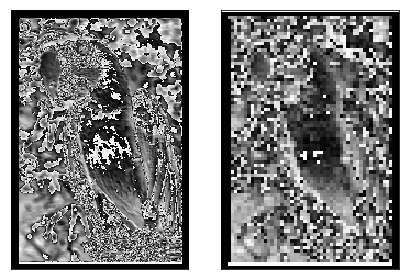

done  Edge Enhance2


In [31]:
def do_tensorflow_convolution_RGB(image, fltr, do_pooling = False):
    #batch of one image of 3 channels
    unstackedColors = tf.unstack(image, num=4, axis=2)
    rgbImage = tf.stack([unstackedColors[0], unstackedColors[1], unstackedColors[2]], axis = 2)  
    imageBatch = tf.reshape(rgbImage, [1, tf.shape(rgbImage)[0], tf.shape(rgbImage)[1],tf.shape(rgbImage)[2]])

    #filter has the shape [filter width, heigh, inChannel, outChannel]       
    sc2 = np.zeros([fltr.shape[0], fltr.shape[1], 3, 3])
    for i in range(fltr.shape[0]):
        for j in range (fltr.shape[1]):
            sc2[i,j,:,:]= fltr[i,j]
    filterTensor = tf.convert_to_tensor(sc2, dtype = tf.float32)       
    conv_image = tf.nn.conv2d(imageBatch, filterTensor, [1, 1, 1, 1], "SAME")
    if do_pooling:
        conv_image = tf.nn.max_pool(conv_image, [1, 3, 3, 1], [1, 3, 3, 1],  padding="SAME")

    output_image = session.run(tf.squeeze(conv_image))
    return output_image 
    
    
for f in FILTERS.keys():
    #conv_output_sp = do_scipy_convolution(image, FILTERS[f])
    print( "start ", f )
    i1 = do_tensorflow_convolution_RGB(image, FILTERS[f])
    i2 = do_tensorflow_convolution_RGB(image, FILTERS[f],do_pooling=True)
    plotImageList( f, [i1, i2])
    print( "done ", f )